## Funciones de distribución de probabilidades 

### Distribución Uniforme

In [1]:
#Generar numeros aleatorios siguiendo la distribucion uniforme
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a,b,n)

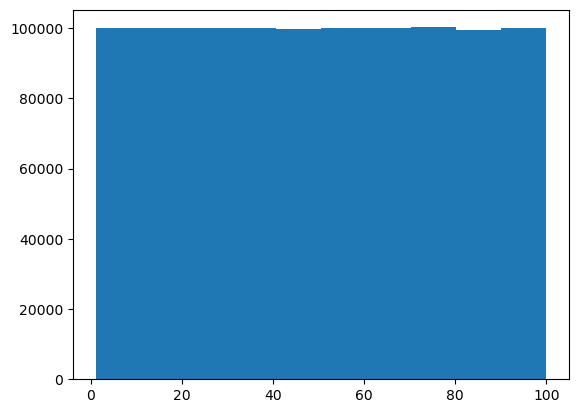

In [3]:
%matplotlib inline
plot = plt.hist(data)

### Distribución Normal

In [4]:
data = np.random.randn(1000000)

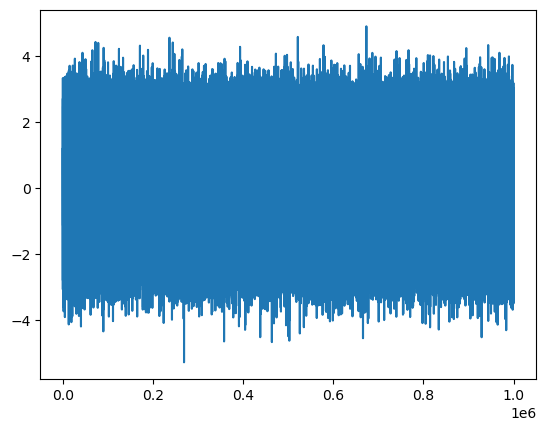

In [5]:
x = range(1,1000001)
plt.plot(x,data)

(array([1.30000e+01, 5.84000e+02, 1.24510e+04, 9.97650e+04, 3.09787e+05,
        3.71843e+05, 1.72586e+05, 3.08310e+04, 2.08500e+03, 5.50000e+01]),
 array([-5.27573935, -4.25959167, -3.243444  , -2.22729632, -1.21114864,
        -0.19500097,  0.82114671,  1.83729439,  2.85344206,  3.86958974,
         4.88573742]),
 <BarContainer object of 10 artists>)

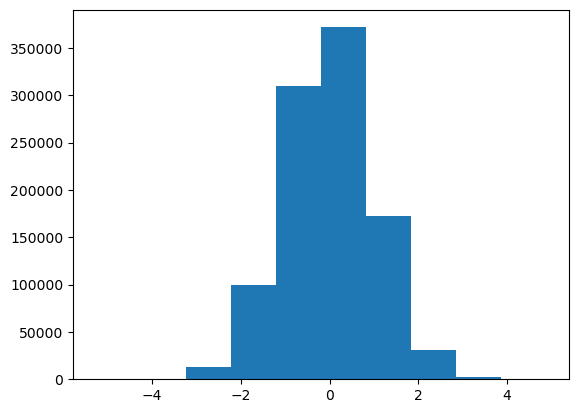

In [6]:
plt.hist(data)

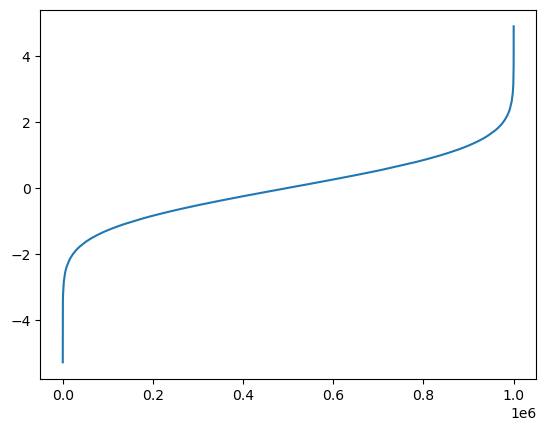

In [7]:
plt.plot(x, sorted(data))

(array([  12.,   78.,  484., 1425., 2719., 2716., 1710.,  694.,  146.,
          16.]),
 array([-4.0951977 , -2.2254191 , -0.35564051,  1.51413809,  3.38391669,
         5.25369529,  7.12347389,  8.99325249, 10.86303108, 12.73280968,
        14.60258828]),
 <BarContainer object of 10 artists>)

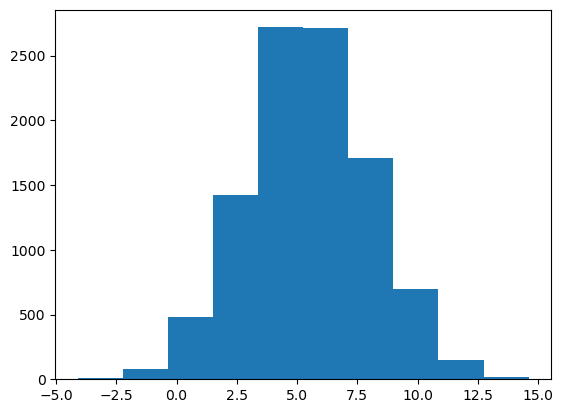

In [8]:
#Una desviacion estandar con media diferente de cero y desviacion estandar diferente de 1
mu = 5.5
sd = 2.5
data = mu + sd*np.random.randn(10000) # Z = (X - mu)/sd -> N(0,1), X = Z*sd + mu
#TEOREMA CENTRAL DEL LIMITE
plt.hist(data)

In [9]:
data1 = np.random.randn(2,4)
data1

array([[-1.10210183, -1.78579648, -0.52958455,  0.23070304],
       [-0.28202485,  0.22974074,  2.12647463,  0.97850416]])

### La simulación de Monte Carlo

* Generamos 2 numeros aleatorios uniforme entre 0 y 1
* Calcularemos x*x + y*y
    * Si el valor es inferior a 1 -> estamos dentro del circulos
    * S1 el valor es superior a 1 -> estamos fuera del circulo 4

* Calculamos el número total de veces que esyán dentro del ciruclo y lo dividimos entre el numero total de untentos para obtener una aproximación de la probabilidad de caer dentro del circulo.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (1000) diferentes aproximaciones de pi.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de pi.

In [20]:
def pi_montecarlo(n, n_exp):

    pi_avg = 0
    #n = 10000 #Numero de puntos
    #n_exp = 100
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]*x[j] + y[j]*y[j])
            if z <= 1:
                value+=1
        float_value=float(value)
        pi_value = float_value*4/n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1415225999999996


(3.1415225999999996, [<matplotlib.lines.Line2D at 0x211d10bd8a0>])

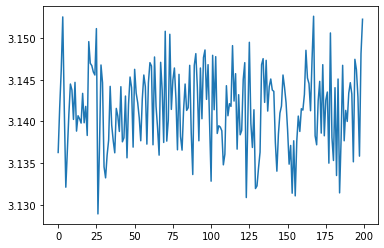

In [22]:
pi_montecarlo(100000, 200)

### Dummy Data Sets

In [29]:
#Son usadas para ver si las recetas de cocina funcionan
n = 1000000
data1 = pd.DataFrame(
    {
        "A": np.random.randn(n),
        "B": 1.5 + 2.5*np.random.randn(n),
        "C": np.random.uniform(5,32,n)
    })

In [30]:
data1

,A,B,C
0,-1.937710,-4.669812,28.005062
1,-0.110047,5.238633,23.216340
2,-0.150707,-4.439546,26.540463
3,-0.325163,4.951730,25.313170
4,-0.569248,1.395577,14.225369
...,...,...,...
999995,1.324540,3.585992,10.358137
999996,1.910126,0.421832,13.931056
999997,1.003625,1.751049,10.925808
999998,-1.121573,0.019302,13.744099


In [31]:
data1.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000575,1.501533,18.499490
std,0.999684,2.498214,7.789816
min,-5.401003,-11.078947,5.000017
25%,-0.673666,-0.183219,11.757318
50%,0.000888,1.503024,18.493033
75%,0.674038,3.182774,25.236056
max,4.619073,12.899783,31.999968


(array([7.00000e+00, 3.40000e+02, 7.93800e+03, 7.33230e+04, 2.65918e+05,
        3.82100e+05, 2.17142e+05, 4.86550e+04, 4.43200e+03, 1.45000e+02]),
 array([-5.40100289, -4.39899527, -3.39698764, -2.39498001, -1.39297239,
        -0.39096476,  0.61104286,  1.61305049,  2.61505811,  3.61706574,
         4.61907336]),
 <BarContainer object of 10 artists>)

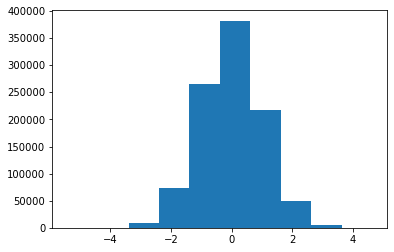

In [33]:
plt.hist(data1["A"])

(array([3.00000e+01, 9.14000e+02, 1.44390e+04, 1.00641e+05, 2.90336e+05,
        3.59200e+05, 1.88252e+05, 4.20530e+04, 3.98400e+03, 1.51000e+02]),
 array([-11.07894659,  -8.68107367,  -6.28320075,  -3.88532783,
         -1.48745491,   0.91041801,   3.30829094,   5.70616386,
          8.10403678,  10.5019097 ,  12.89978262]),
 <BarContainer object of 10 artists>)

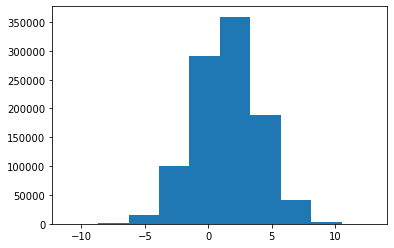

In [34]:
plt.hist(data1["B"])

(array([ 99972.,  99689.,  99947., 100198., 100453., 100158.,  99902.,
         99585., 100276.,  99820.]),
 array([ 5.00001711,  7.70001218, 10.40000725, 13.10000232, 15.7999974 ,
        18.49999247, 21.19998754, 23.89998262, 26.59997769, 29.29997276,
        31.99996784]),
 <BarContainer object of 10 artists>)

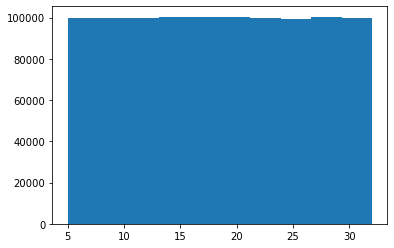

In [35]:
plt.hist(data1["C"])

In [36]:
data2 = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [37]:
data2.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [39]:
columns_names = data2.columns.values.tolist()

In [40]:
a = len(columns_names)
a

21

In [44]:
new_data = pd.DataFrame(
{
    "Column Name": columns_names,
    "A": np.random.randn(a),
    "B": np.random.uniform(0,1,a)
    
}, index=range(42, 42+a))

In [46]:
new_data

,Column Name,A,B
42,State,-0.784549,0.776643
43,Account Length,-1.776834,0.125125
44,Area Code,-1.578712,0.808515
45,Phone,1.100475,0.619140
46,Int'l Plan,-0.274690,0.875333
47,VMail Plan,-1.133988,0.446469
48,VMail Message,1.258546,0.902594
49,Day Mins,0.341962,0.824636
50,Day Calls,2.154118,0.015964
51,Day Charge,-0.085556,0.329227
